In [240]:
import numpy as np
from IPython.display import Math
import math

In [241]:
Math(r'f(x_1, x_2) = e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} + e^{-x_1 - 0.1}')

<IPython.core.display.Math object>

In [242]:
def f(x1, y1):
    return math.exp(x1 + 3 * y1 - 0.1) + math.exp(x1 - 3 * y1 - 0.1) + math.exp(-x1 - 0.1)

In [243]:
Math(r'\frac{{d}f}{{d}x_1} = e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} - e^{-x_1 - 0.1}')

<IPython.core.display.Math object>

In [244]:
def dfx1(x1, x2):
    return math.exp(x1 + 3*x2 - 0.1) + math.exp(x1 - 3*x2 - 0.1) - math.exp(- x1 - 0.1)

In [245]:
Math(r' \frac{{d}f}{{d}x_2} = 3e^{x_1 + 3x_2 - 0.1} - 3e^{x_1 - 3x_2 - 0.1}')

<IPython.core.display.Math object>

In [246]:
def dfx2(x1, x2):
    return 3*math.exp(x1 + 3*x2 - 0.1) - 3*math.exp(x1 - 3*x2 - 0.1)

In [247]:
def gradient_descent(function, l_r):
    x = 0.4
    y = 0.4
    l = 1;
    points = []
    while l >= 10**-5:
        x_t = x - l_r * dfx1(x, y)
        y_t = y - l_r * dfx2(x, y)
        l = f(x, y) - f(x_t, y_t) 
        x = x_t
        y = y_t
        points.append([x,y])
    points = np.array(points)
    return x,y, points

In [248]:
learning_rate = 0.001

In [249]:
a,b,points = gradient_descent(f, learning_rate)

In [250]:
a,b

(-0.3076510851725564, 2.3496824878981894e-08)

In [251]:
f(a,b)

2.56120553654576

In [252]:
examples = np.zeros((20,20))

In [253]:
def point_to_grid(a):
    return a/20.0-0.5

In [254]:
def grid_to_point(a):
    return 20.0*(a+0.5)

In [255]:
for y in range(examples.shape[0]):
    for x in range(examples.shape[1]):
        examples[y][x] = f(point_to_grid(x), point_to_grid(y))

In [256]:
from matplotlib import pyplot as plt

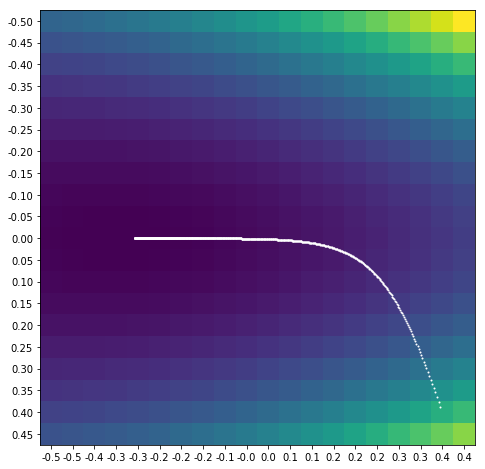

In [257]:
plt.figure(figsize=(8,8))
plt.imshow(examples)
plt.scatter(
    [grid_to_point(t[0]) for t in points], 
    [grid_to_point(t[1]) for t in points], color='white', s=1)
plt.xticks(range(examples.shape[1]), ["{:.1f}".format(point_to_grid(t)) for t in range(examples.shape[1])]);
plt.yticks(range(examples.shape[0]), ["{:.2f}".format(point_to_grid(t)) for t in range(examples.shape[0])]);

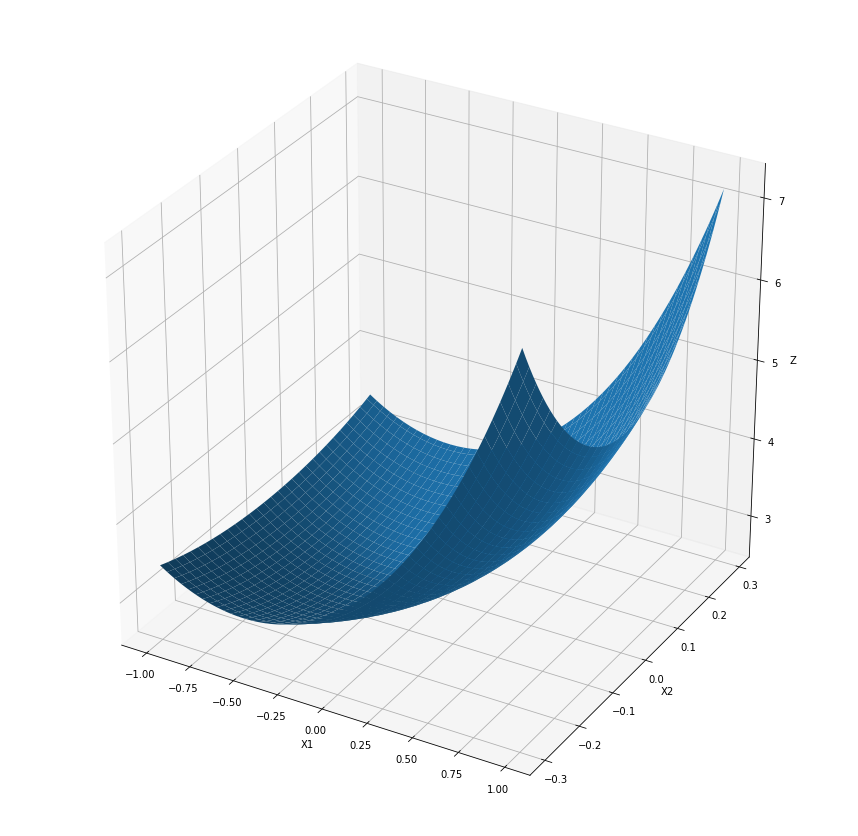

In [288]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(-1.0, 1.0, 0.01)
y = np.arange(-0.3, 0.3, 0.01)
X, Y = np.meshgrid(x, y)
zs = np.array([f(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')

plt.show()